In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [2]:
# Load movie data
import pandas as pd
all_data_df = pd.read_pickle('../dump/all_correctRT_data')

In [3]:
# all_data_df.head()

In [4]:
# all_df = all_data_df.drop(columns=['rating','vote','metascore','keywords',\
#                                        'link_d','link_s','link_w',\
#                                    'book_title','rating_value','rating_count','review_count','title']).\
#                     drop_duplicates(subset=['movie_title','director'])
all_df = all_data_df.drop(columns=['vote','metascore','keywords',\
                                       'link_d','link_s','link_w',\
                                   'book_title','rating_value','rating_count','review_count','title']).\
                    drop_duplicates(subset=['movie_title','director'])

all_df.rename(columns = {'certificate':'MPAA'},inplace=True)

In [5]:
all_df = all_df.dropna().reset_index()

In [6]:
# all_df

In [7]:
all_df.shape

(581, 22)

In [8]:
all_df.columns

Index(['index', 'movie_title', 'rating', 'MPAA', 'genre', 'release_date',
       'budget', 'opening_weekend_usa', 'gross_usa', 'gross_world', 'runtime',
       'director', 'writer', 'star', 'distributor', 'language', 'country',
       'author', 'page', 'year', 'book_popularity', 'author_popularity'],
      dtype='object')

In [9]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                581 non-null    int64         
 1   movie_title          581 non-null    object        
 2   rating               581 non-null    float64       
 3   MPAA                 581 non-null    object        
 4   genre                581 non-null    object        
 5   release_date         581 non-null    datetime64[ns]
 6   budget               581 non-null    float64       
 7   opening_weekend_usa  581 non-null    float64       
 8   gross_usa            581 non-null    float64       
 9   gross_world          581 non-null    float64       
 10  runtime              581 non-null    float64       
 11  director             581 non-null    object        
 12  writer               581 non-null    object        
 13  star                 581 non-null  

## Clean each column


### *Target variable: opening weekend usa* 



<AxesSubplot:>

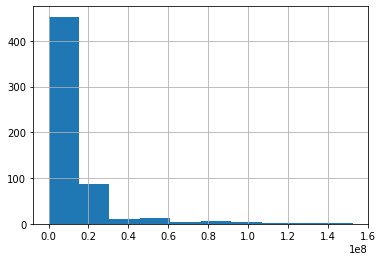

In [10]:
all_df['opening_weekend_usa'].hist(bins=10)

In [11]:
all_df['opening_weekend_usa'].max()

152535747.0

In [12]:
tt = all_df[(all_df['opening_weekend_usa']<2e8) & (all_df['opening_weekend_usa'] > 1e6)]

<AxesSubplot:>

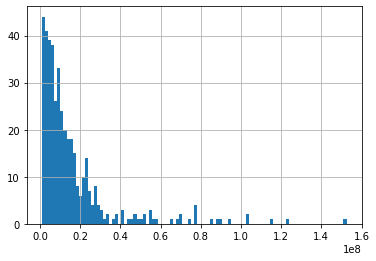

In [13]:
tt['opening_weekend_usa'].hist(bins=100)

<AxesSubplot:>

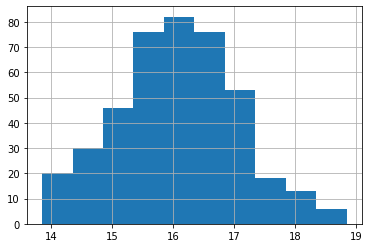

In [14]:
np.log(tt['opening_weekend_usa']).hist()

In [15]:
tt['log_opening_weekend_usa'] = np.log(tt['opening_weekend_usa'])

<ipython-input-15-dfd567e2d602>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt['log_opening_weekend_usa'] = np.log(tt['opening_weekend_usa'])


In [16]:
tt.shape

(420, 23)

In [17]:
all_df = tt

In [18]:
all_df

,index,movie_title,rating,MPAA,genre,release_date,budget,opening_weekend_usa,gross_usa,gross_world,...,star,distributor,language,country,author,page,year,book_popularity,author_popularity,log_opening_weekend_usa
1,2,Harry Potter and the Sorcerer's Stone,7.6,PG,"[Adventure, Family, Fantasy]",2001-11-16,125000000.0,90294621.0,318087620.0,1.006918e+09,...,"[Daniel Radcliffe, Rupert Grint, Richard Harris]",WarnerBros.,[English],"[UK, USA]",J.K. Rowling,309.0,1997.0,0.14,0.0149,18.318588
2,4,Little Women,7.8,PG,"[Drama, Romance]",2019-12-25,40000000.0,16755310.0,108101214.0,2.166012e+08,...,"[Saoirse Ronan, Emma Watson, Florence Pugh]",ColumbiaPictures,"[English, French]",[USA],Louisa May Alcott,449.0,1868.0,0.00,0.0151,16.634226
3,8,Little Women,7.3,PG,"[Drama, Family, Romance]",1994-12-25,18000000.0,2411247.0,50083616.0,5.008362e+07,...,"[Susan Sarandon, Winona Ryder, Kirsten Dunst]",ColumbiaPictures,"[English, German, French]","[USA, Canada]",Louisa May Alcott,449.0,1868.0,0.00,0.0151,14.695655
4,20,Ready Player One,7.5,PG-13,"[Action, Adventure, Sci-Fi]",2018-03-29,175000000.0,41764050.0,137690172.0,5.828937e+08,...,"[Tye Sheridan, Olivia Cooke, Ben Mendelsohn]",WarnerBros.,[English],"[USA, India]",Ernest Cline,374.0,2011.0,0.00,0.0012,17.547546
5,21,The Invisible Man,7.1,R,"[Drama, Horror, Mystery]",2020-02-28,7000000.0,28205665.0,70410000.0,1.431510e+08,...,"[Elisabeth Moss, Oliver Jackson-Cohen, Harriet...",UniversalPictures,[English],"[Canada, Australia, USA]",H.G. Wells,192.0,1897.0,0.00,0.1500,17.155033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,1529,Legends of Oz: Dorothy's Return,5.1,PG,"[Animation, Adventure, Family]",2014-05-09,70000000.0,3747780.0,8462347.0,2.175542e+07,...,"[Lea Michele, Kelsey Grammer, Dan Aykroyd]",SummertimeEntertainment(II),[English],"[USA, India]",Denton J. Tipton,104.0,2012.0,0.00,0.0002,15.136674
573,1537,Tai-Pan,5.6,R,[Adventure],1986-11-07,25000000.0,1863469.0,4007250.0,4.007250e+06,...,"[Bryan Brown, Joan Chen, John Stanton]",DeLaurentiisEntertainmentGroup(DEG),[English],[USA],James Clavell,734.0,1966.0,0.01,0.0134,14.437950
574,1547,Losing Isaiah,6.5,R,[Drama],1995-03-17,17000000.0,2520972.0,7603766.0,7.603766e+06,...,"[Jessica Lange, Halle Berry, David Strathairn]",ParamountPictures,[English],[USA],Seth Margolis,374.0,1993.0,0.00,0.0046,14.740155
576,1552,Never Die Alone,5.7,R,"[Action, Crime, Drama]",2004-03-26,3000000.0,3089993.0,5645298.0,5.923000e+06,...,"[DMX, David Arquette, Michael Ealy]",BloodlineFilms,[English],[USA],Lisa Jackson,480.0,2015.0,0.26,0.0093,14.943679


### Independent variable


### Continuous variables:
#### 1. Release_year

In [19]:
all_df['release_year'] = all_df.release_date.dt.year
all_df['release_year'].dtype

dtype('int64')

In [20]:
all_df

,index,movie_title,rating,MPAA,genre,release_date,budget,opening_weekend_usa,gross_usa,gross_world,...,distributor,language,country,author,page,year,book_popularity,author_popularity,log_opening_weekend_usa,release_year
1,2,Harry Potter and the Sorcerer's Stone,7.6,PG,"[Adventure, Family, Fantasy]",2001-11-16,125000000.0,90294621.0,318087620.0,1.006918e+09,...,WarnerBros.,[English],"[UK, USA]",J.K. Rowling,309.0,1997.0,0.14,0.0149,18.318588,2001
2,4,Little Women,7.8,PG,"[Drama, Romance]",2019-12-25,40000000.0,16755310.0,108101214.0,2.166012e+08,...,ColumbiaPictures,"[English, French]",[USA],Louisa May Alcott,449.0,1868.0,0.00,0.0151,16.634226,2019
3,8,Little Women,7.3,PG,"[Drama, Family, Romance]",1994-12-25,18000000.0,2411247.0,50083616.0,5.008362e+07,...,ColumbiaPictures,"[English, German, French]","[USA, Canada]",Louisa May Alcott,449.0,1868.0,0.00,0.0151,14.695655,1994
4,20,Ready Player One,7.5,PG-13,"[Action, Adventure, Sci-Fi]",2018-03-29,175000000.0,41764050.0,137690172.0,5.828937e+08,...,WarnerBros.,[English],"[USA, India]",Ernest Cline,374.0,2011.0,0.00,0.0012,17.547546,2018
5,21,The Invisible Man,7.1,R,"[Drama, Horror, Mystery]",2020-02-28,7000000.0,28205665.0,70410000.0,1.431510e+08,...,UniversalPictures,[English],"[Canada, Australia, USA]",H.G. Wells,192.0,1897.0,0.00,0.1500,17.155033,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,1529,Legends of Oz: Dorothy's Return,5.1,PG,"[Animation, Adventure, Family]",2014-05-09,70000000.0,3747780.0,8462347.0,2.175542e+07,...,SummertimeEntertainment(II),[English],"[USA, India]",Denton J. Tipton,104.0,2012.0,0.00,0.0002,15.136674,2014
573,1537,Tai-Pan,5.6,R,[Adventure],1986-11-07,25000000.0,1863469.0,4007250.0,4.007250e+06,...,DeLaurentiisEntertainmentGroup(DEG),[English],[USA],James Clavell,734.0,1966.0,0.01,0.0134,14.437950,1986
574,1547,Losing Isaiah,6.5,R,[Drama],1995-03-17,17000000.0,2520972.0,7603766.0,7.603766e+06,...,ParamountPictures,[English],[USA],Seth Margolis,374.0,1993.0,0.00,0.0046,14.740155,1995
576,1552,Never Die Alone,5.7,R,"[Action, Crime, Drama]",2004-03-26,3000000.0,3089993.0,5645298.0,5.923000e+06,...,BloodlineFilms,[English],[USA],Lisa Jackson,480.0,2015.0,0.26,0.0093,14.943679,2004


<AxesSubplot:>

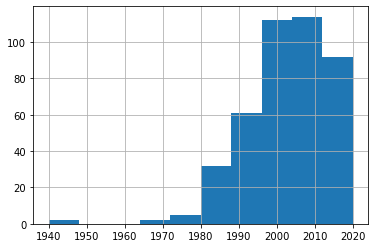

In [21]:
all_df['release_year'].hist()

In [22]:
tt = all_df[(all_df['release_year']>1970)]

In [23]:
tt['how_old'] = 2020 - tt['release_year']

<ipython-input-23-4b0506b399af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt['how_old'] = 2020 - tt['release_year']


<AxesSubplot:>

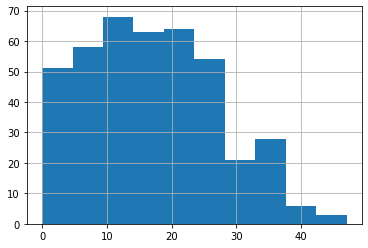

In [24]:
tt['how_old'].hist()

In [25]:
tt.shape

(416, 25)

In [26]:
all_df = tt

#### 2. Budget

<AxesSubplot:>

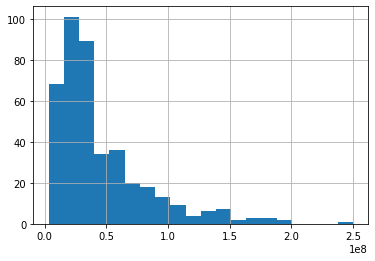

In [27]:
all_df['budget'].hist(bins=20)

In [28]:
# Remove large 
tt = all_df[all_df.budget <2e8]

<AxesSubplot:>

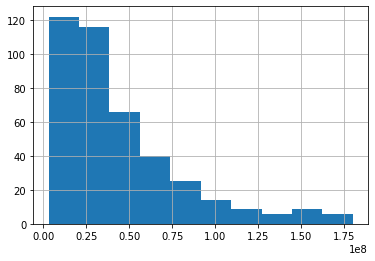

In [29]:
tt['budget'].hist()

In [30]:
tt.shape

(413, 25)

<AxesSubplot:>

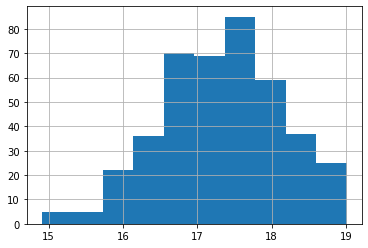

In [31]:
np.log(tt['budget']).hist()

In [32]:
tt['log_budget'] = np.log(tt['budget'])

<ipython-input-32-975e4f58418d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt['log_budget'] = np.log(tt['budget'])


In [33]:
all_df = tt

In [34]:
all_df.shape

(413, 26)

#### 3. runtime

<AxesSubplot:>

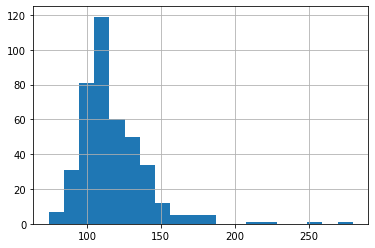

In [35]:
all_df['runtime'].hist(bins=20)

In [36]:
all_df['runtime'].nlargest(10)

452    280.0
33     250.0
441    220.0
40     215.0
315    187.0
8      180.0
80     178.0
36     177.0
307    177.0
390    176.0
Name: runtime, dtype: float64

In [37]:
# Remove large 
tt = all_df[all_df.runtime <200]

<AxesSubplot:>

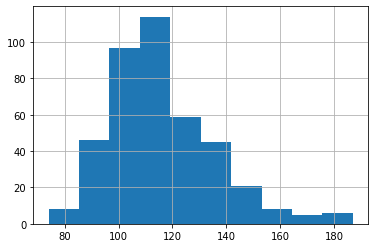

In [38]:
tt['runtime'].hist()

In [39]:
tt.shape

(409, 26)

In [40]:
all_df = tt

#### 4. page

<AxesSubplot:>

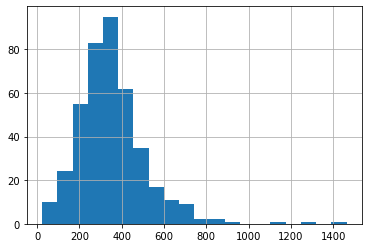

In [41]:
all_df['page'].hist(bins=20)

In [42]:
all_df['page'].nlargest(10)

53     1463.0
149    1312.0
34     1116.0
234     928.0
29      870.0
415     867.0
119     771.0
304     748.0
109     736.0
12      734.0
Name: page, dtype: float64

In [43]:
# Remove large 
tt = all_df[all_df.page < 1000]

<AxesSubplot:>

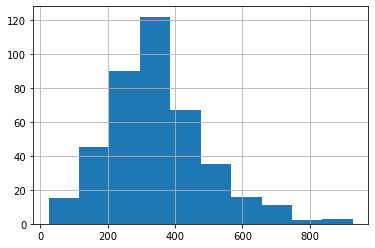

In [44]:
tt['page'].hist()

In [45]:
tt.shape

(406, 26)

In [46]:
all_df = tt

#### 5. publish_year

<AxesSubplot:>

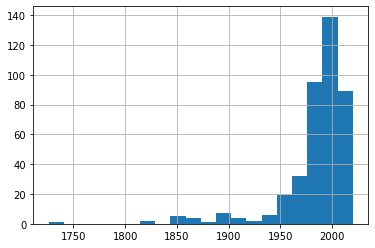

In [47]:
all_df['year'].hist(bins=20)

In [48]:
all_df['year'].nsmallest(10)

461    1726.0
277    1817.0
60     1826.0
150    1844.0
151    1844.0
415    1848.0
197    1850.0
440    1850.0
349    1861.0
235    1864.0
Name: year, dtype: float64

In [49]:
# Remove large 
tt = all_df[all_df.year > 1927]

<AxesSubplot:>

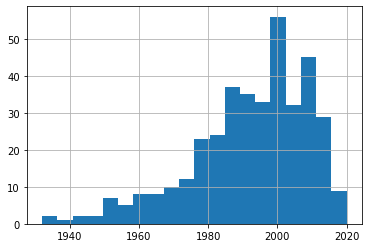

In [50]:
tt['year'].hist(bins=20)

In [51]:
tt['how_old_book'] = 2020 - tt['year']

<ipython-input-51-316ad2105918>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt['how_old_book'] = 2020 - tt['year']


<AxesSubplot:>

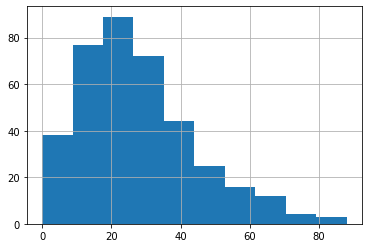

In [52]:
tt['how_old_book'].hist()

In [53]:
tt.shape

(380, 27)

<AxesSubplot:>

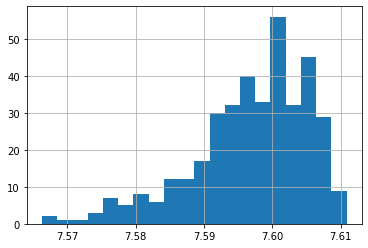

In [54]:
np.log(tt['year']).hist(bins=20)

In [55]:
all_df = tt

#### 6. author_popularity

<AxesSubplot:>

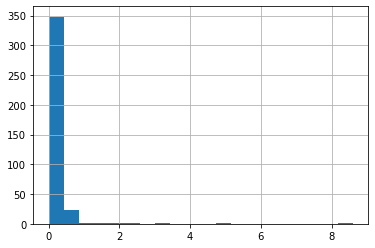

In [56]:
all_df['author_popularity'].hist(bins=20)

In [57]:
all_df['author_popularity'].nsmallest(10)

73     0.0000
116    0.0000
294    0.0000
401    0.0000
544    0.0000
75     0.0001
131    0.0001
238    0.0001
261    0.0001
263    0.0001
Name: author_popularity, dtype: float64

In [58]:
# Remove large 
tt = all_df[all_df.author_popularity > 0]

<AxesSubplot:>

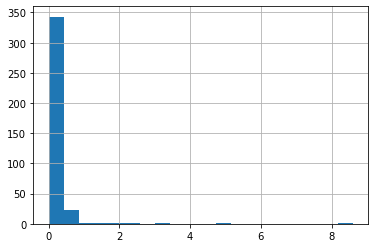

In [59]:
tt['author_popularity'].hist(bins=20)

In [60]:
tt.shape

(375, 27)

In [61]:
# all_df = tt

In [62]:
all_df.shape

(380, 27)

In [63]:
all_df.director.head()

1       Chris Columbus
4     Steven Spielberg
7      Robert Zemeckis
8        Mike Flanagan
9    Christopher Nolan
Name: director, dtype: object

### Single lable categorical variables
### 1. MPAA rating
Find the distribution and keep only the top frequent categories

In [64]:
all_df.MPAA.unique()

array(['PG', 'PG-13', 'R', 'G'], dtype=object)

In [65]:
all_df.MPAA.value_counts()

R        165
PG-13    138
PG        71
G          6
Name: MPAA, dtype: int64

In [66]:
# Keep only the top 3
MPAA_discard = ['G','Passed','Not','X','M/PG','Approved','NC-17','Unrated']
all_df.MPAA.replace(MPAA_discard,'Other',inplace=True)

In [67]:
all_df.MPAA.value_counts()

R        165
PG-13    138
PG        71
Other      6
Name: MPAA, dtype: int64

### 2. distributor

In [68]:
all_df.distributor.value_counts().head(5)

WarnerBros.            34
ParamountPictures      29
ColumbiaPictures       25
UniversalPictures      23
TwentiethCenturyFox    21
Name: distributor, dtype: int64

In [69]:
# Keep only the top 3
distributor_keep = ['WarnerBros.','ParamountPictures','ColumbiaPictures','UniversalPictures',\
             'TwentiethCenturyFox','TwentiethCenturyFox']
distributor_discard = list(set(all_df.distributor.unique()).difference(set(distributor_keep)))
all_df.distributor.replace(distributor_discard,'Other',inplace=True)

In [70]:
all_df.distributor.value_counts()

Other                  248
WarnerBros.             34
ParamountPictures       29
ColumbiaPictures        25
UniversalPictures       23
TwentiethCenturyFox     21
Name: distributor, dtype: int64

### 3. director

In [71]:
all_df.director.value_counts()

Steven Spielberg         6
Lasse Hallström          5
Phillip Noyce            4
Ridley Scott             4
Clint Eastwood           4
                        ..
Alex Proyas              1
Rob Reiner               1
Shari Springer Berman    1
Jonathan Levine          1
Jules Bass               1
Name: director, Length: 279, dtype: int64

In [72]:
# Find corresponding value of each director when movie is released
# ['avg_rating','avg_gross'] (per movie directed)
director_df = pd.read_pickle('../dump/director_data')

In [73]:
director_df.head(10)

,director,title,year,rating,vote,genre_list,budget,opening,gross_usa,gross_cw,runtime,writer,star,distributor
0,Roger Kumble,After We Collided,2020-10-23,5.0,16469.0,"[Drama, Romance]",NaN,422899.0,2386483.0,47990414.0,105.0,"[Anna Todd, Mario Celaya]","[Josephine Langford, Hero Fiennes Tiffin, Dyla...",CalMaple
1,Roger Kumble,Falling Inn Love,2019-08-29,5.6,15662.0,"[Comedy, Romance]",NaN,NaN,NaN,NaN,98.0,"[Elizabeth Hackett, Hilary Galanoy]","[Christina Milian, Adam Demos, Jeffrey Bowyer-...",NaN
2,I. Marlene King,Pretty Little Liars: The,NaT,7.1,3862.0,"[Crime, Drama, Mystery]",NaN,NaN,NaN,NaN,45.0,"[Sasha Pieterse, Janel Parrish, Sofia Carson, ...",NaN,WarnerHorizonTelevision
3,Aaron Korsh,,NaT,8.5,361371.0,"[Comedy, Drama]",NaN,NaN,NaN,NaN,44.0,"[Gabriel Macht, Patrick J. Adams, Meghan Markl...",NaN,Hypnotic
4,I. Marlene King,Famous in,NaT,6.9,5726.0,"[Drama, Romance]",NaN,NaN,NaN,NaN,42.0,"[Bella Thorne, Charlie DePew, Carter Jenkins, ...",NaN,FarahFilms
5,Erin Cardillo,Life,NaT,6.6,3401.0,"[Comedy, Drama]",NaN,NaN,NaN,NaN,44.0,"[Lucy Hale, Elliot Knight, Jayson Blair, See f...",NaN,InGoodCompany
6,I. Marlene King,Pretty Little,NaT,7.4,151550.0,"[Drama, Mystery, Romance]",NaN,NaN,NaN,NaN,NaN,"[Troian Bellisario, Ashley Benson, Lucy Hale, ...",NaN,ABCFamily
7,Roger Kumble,Cruel Intentions,NaT,7.6,293.0,[Drama],NaN,NaN,NaN,NaN,97.0,"[Roger Kumble, Lindsey Rosin]","[Sarah Michelle Gellar, Nathalie Kelley, Peter...",AMBIGroup
8,Adam Cayton-Holland,Those Who,NaT,7.2,1238.0,[Comedy],NaN,NaN,NaN,NaN,30.0,"[Maria Thayer, Adam Cayton-Holland, Ben Roy, S...",NaN,3ArtsEntertainment
9,Mindy Kaling,The Mindy,NaT,7.4,28496.0,[Comedy],NaN,NaN,NaN,NaN,30.0,"[Mindy Kaling, Ike Barinholtz, Ed Weeks, See f...",NaN,KalingInternational


In [74]:
director_rating_mean = int(director_df.rating.mean())
director_gross_mean = int(director_df.gross_usa.mean())

director_rating_mean, director_gross_mean

(6, 32634196)

In [75]:
import numpy as np
def director_value(movie):
    
    movie_title = movie.movie_title
    director = movie.director
    year = movie.release_date

    headers = ['movie_title','director','film_count_d','avg_rating_d','avg_gross_d']
    
    # Assign default values
    film_count,avg_rating,avg_gross = 0, director_rating_mean, director_gross_mean
    
    doi_df = director_df[(director_df.director == director) & (director_df.year < year)]
    
    # Fill NaN with director's mean
    doi_df[['rating','gross_usa']].apply(lambda x: x.fillna(x.mean(),axis=0))
    
    # If there's still NaN, fill with all directors' mean
    doi_df[['rating']] = doi_df[['rating']].apply(lambda x: x.fillna(director_rating_mean,axis=0))
    doi_df[['gross_usa']] = doi_df[['gross_usa']].apply(lambda x: x.fillna(director_gross_mean,axis=0))
    
   
    if doi_df.shape[0] == 0:
        film_count,avg_rating,avg_gross = 0, director_rating_mean, director_gross_mean
    else:
        
    
    
        film_count = doi_df.shape[0]

        
        avg_rating = doi_df['rating'].mean()
        if avg_rating == np.nan:
            avg_rating = director_rating_mean

        try:
            avg_gross = int(doi_df['gross_usa'].mean())
        except ValueError:
            avg_gross = director_gross_mean
        
    
    director_value = dict(zip(headers, [movie_title,director,film_count,avg_rating,avg_gross]))
    
    return director_value

In [76]:
# Create df including columns of director film_count, avg_rating, avg_gross
# Rows correspond to rows in all_df
movie_director_df = all_df.dropna().apply(director_value,axis=1).apply(pd.Series)

In [77]:
movie_director_df

,movie_title,director,film_count_d,avg_rating_d,avg_gross_d
1,Harry Potter and the Sorcerer's Stone,Chris Columbus,9,6.622222,106588545
4,Ready Player One,Steven Spielberg,34,7.202941,132444136
7,Forrest Gump,Robert Zemeckis,9,7.188889,84047311
8,Doctor Sleep,Mike Flanagan,10,6.120000,32391331
9,The Prestige,Christopher Nolan,6,7.550000,60844947
...,...,...,...,...,...
572,Legends of Oz: Dorothy's Return,Will Finn,1,5.400000,50030461
573,Tai-Pan,Daryl Duke,4,6.575000,32634196
574,Losing Isaiah,Stephen Gyllenhaal,4,6.025000,9153181
576,Never Die Alone,Ernest R. Dickerson,7,6.157143,20446469


In [78]:
movie_director_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 1 to 579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_title   380 non-null    object 
 1   director      380 non-null    object 
 2   film_count_d  380 non-null    int64  
 3   avg_rating_d  380 non-null    float64
 4   avg_gross_d   380 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 17.8+ KB


In [79]:
# Merge all_df and director value
all_d_df = pd.merge(all_df, movie_director_df, left_index=True, right_index=True ,how='left')

In [80]:
all_d_df.head()

,index,movie_title_x,rating,MPAA,genre,release_date,budget,opening_weekend_usa,gross_usa,gross_world,...,log_opening_weekend_usa,release_year,how_old,log_budget,how_old_book,movie_title_y,director_y,film_count_d,avg_rating_d,avg_gross_d
1,2,Harry Potter and the Sorcerer's Stone,7.6,PG,"[Adventure, Family, Fantasy]",2001-11-16,125000000.0,90294621.0,318087620.0,1.006918e+09,...,18.318588,2001,19,18.643824,23.0,Harry Potter and the Sorcerer's Stone,Chris Columbus,9,6.622222,106588545
4,20,Ready Player One,7.5,PG-13,"[Action, Adventure, Sci-Fi]",2018-03-29,175000000.0,41764050.0,137690172.0,5.828937e+08,...,17.547546,2018,2,18.980297,9.0,Ready Player One,Steven Spielberg,34,7.202941,132444136
7,26,Forrest Gump,8.8,PG-13,"[Drama, Romance]",1994-07-06,55000000.0,24450602.0,330455270.0,6.782261e+08,...,17.012165,1994,26,17.822844,34.0,Forrest Gump,Robert Zemeckis,9,7.188889,84047311
8,32,Doctor Sleep,7.3,R,"[Drama, Fantasy, Horror]",2019-11-08,45000000.0,14114124.0,31581712.0,7.238171e+07,...,16.462687,2019,1,17.622173,7.0,Doctor Sleep,Mike Flanagan,10,6.120000,32391331
9,33,The Prestige,8.5,PG-13,"[Drama, Mystery, Sci-Fi]",2006-10-20,40000000.0,14801808.0,53089891.0,1.096763e+08,...,16.510260,2006,14,17.504390,25.0,The Prestige,Christopher Nolan,6,7.550000,60844947


In [81]:
all_d_df.shape

(380, 32)

In [82]:
tt = all_d_df[all_d_df['avg_gross_d']<1e8]

<AxesSubplot:>

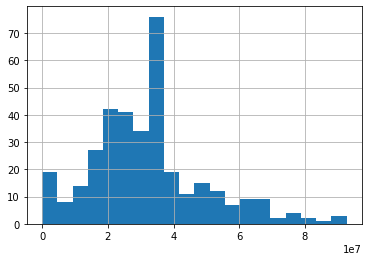

In [83]:
tt['avg_gross_d'].hist(bins=20)

<AxesSubplot:>

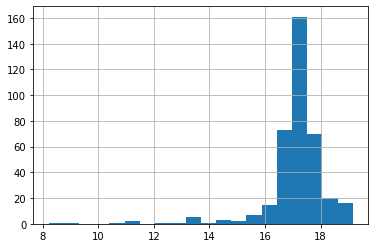

In [84]:
np.log(all_d_df['avg_gross_d']).hist(bins=20)

In [85]:
tt.shape

(355, 32)

In [86]:
all_df = tt

In [87]:
all_df.rename(columns = {'movie_title_x':'movie_title','author_x': 'author'},inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### 4. author

In [88]:
all_df.author.value_counts()

Stephen King          14
Nicholas Sparks        9
John Grisham           6
Michael Crichton       6
Elmore Leonard         4
                      ..
Pat Conroy             1
Toni Morrison          1
Jacquelyn Mitchard     1
Mary Norton            1
Lawrence Block         1
Name: author, Length: 272, dtype: int64

In [89]:
# Find corresponding value of each authorr when movie is released
# ['publications','author_visibility']
# Load author_book_data (author: list of publication years)
author_book_df = pd.read_pickle('../dump/author_book_data')

In [90]:
author_book_df.head(10)

,author,years
0,Anna Todd,"[2020, 2018, 2018, 2017, 2017, 2016, 2016, 201..."
1,Alex Flinn,"[2020, 2019, 2017, 2015, 2015, 2013, 2012, 201..."
2,James Fenimore Cooper,"[2017, 2012, 2012, 2010, 2009, 2006, 1841, 1826]"
3,Amy Daws,"[2020, 2019, 2019, 2018, 2018, 2018, 2018, 201..."
4,John Bellairs,"[2020, 2015, 2009, 2004, 2004, 2004, 2004, 200..."
5,Knut Hamsun,"[2013, 2011, 2010, 2007, 2002, 2000, 1998, 199..."
6,Agatha Christie,"[2020, 2020, 2020, 2020, 1998, 1989, 1989, 198..."
7,Nicholas Shakespeare,"[2020, 2007, 2004, 1997, 1993, 1990]"
8,Maurice G. Dantec,"[2009, 2008, 2005]"
9,Trevanian,"[2005, 2005, 2005, 2002, 1998, 1988, 1988, 1984]"


In [91]:
import numpy as np
def author_value(movie):
    
    movie_title = movie.movie_title
    author = movie.author
    year = movie.release_year

    headers = ['movie_title','author','publication_count']
    
    # Assign default values
    publication_count = np.nan
    
    aoi_df = author_book_df[(author_book_df.author == author)]
    publications = [book for book in aoi_df.iloc[0,1] if book < year]
    publication_count = len(publications)

        
    author_value = dict(zip(headers, [movie_title,author,publication_count]))
    
    return author_value

In [92]:
# Create df including columns of author publication_count
# Rows correspond to rows in all_df
movie_author_df = all_df.dropna().apply(author_value,axis=1).apply(pd.Series)

In [93]:
movie_author_df

,movie_title,author,publication_count
7,Forrest Gump,Winston Groom,5
8,Doctor Sleep,Stephen King,123
9,The Prestige,Christopher Priest,0
10,The Girl with the Dragon Tattoo,Stieg Larsson,3
11,Fight Club,Chuck Palahniuk,1
...,...,...,...
571,The Lonely Lady,Harold Robbins,7
572,Legends of Oz: Dorothy's Return,Denton J. Tipton,2
573,Tai-Pan,James Clavell,6
574,Losing Isaiah,Seth Margolis,3


In [94]:
# Merge all_d_df and director value
all_df = pd.merge(all_d_df, movie_author_df, left_index=True, right_index=True ,how='left').\
    drop(columns=['movie_title','movie_title_y','director_y','author_y'])

In [95]:
all_df.head()

,index,movie_title_x,rating,MPAA,genre,release_date,budget,opening_weekend_usa,gross_usa,gross_world,...,author_popularity,log_opening_weekend_usa,release_year,how_old,log_budget,how_old_book,film_count_d,avg_rating_d,avg_gross_d,publication_count
1,2,Harry Potter and the Sorcerer's Stone,7.6,PG,"[Adventure, Family, Fantasy]",2001-11-16,125000000.0,90294621.0,318087620.0,1.006918e+09,...,0.0149,18.318588,2001,19,18.643824,23.0,9,6.622222,106588545,NaN
4,20,Ready Player One,7.5,PG-13,"[Action, Adventure, Sci-Fi]",2018-03-29,175000000.0,41764050.0,137690172.0,5.828937e+08,...,0.0012,17.547546,2018,2,18.980297,9.0,34,7.202941,132444136,NaN
7,26,Forrest Gump,8.8,PG-13,"[Drama, Romance]",1994-07-06,55000000.0,24450602.0,330455270.0,6.782261e+08,...,0.0243,17.012165,1994,26,17.822844,34.0,9,7.188889,84047311,5.0
8,32,Doctor Sleep,7.3,R,"[Drama, Fantasy, Horror]",2019-11-08,45000000.0,14114124.0,31581712.0,7.238171e+07,...,0.5922,16.462687,2019,1,17.622173,7.0,10,6.120000,32391331,123.0
9,33,The Prestige,8.5,PG-13,"[Drama, Mystery, Sci-Fi]",2006-10-20,40000000.0,14801808.0,53089891.0,1.096763e+08,...,0.0038,16.510260,2006,14,17.504390,25.0,6,7.550000,60844947,0.0


In [96]:
all_df.shape

(380, 31)

In [97]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 1 to 579
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    380 non-null    int64         
 1   movie_title_x            380 non-null    object        
 2   rating                   380 non-null    float64       
 3   MPAA                     380 non-null    object        
 4   genre                    380 non-null    object        
 5   release_date             380 non-null    datetime64[ns]
 6   budget                   380 non-null    float64       
 7   opening_weekend_usa      380 non-null    float64       
 8   gross_usa                380 non-null    float64       
 9   gross_world              380 non-null    float64       
 10  runtime                  380 non-null    float64       
 11  director_x               380 non-null    object        
 12  writer                   380 non-nul

In [98]:
all_df.corr()

,index,rating,budget,opening_weekend_usa,gross_usa,gross_world,runtime,page,year,book_popularity,author_popularity,log_opening_weekend_usa,release_year,how_old,log_budget,how_old_book,film_count_d,avg_rating_d,avg_gross_d,publication_count
index,1.000000,-0.512941,-0.387901,-0.504749,-0.576179,-0.590403,-0.384775,-0.059456,-0.089598,0.057104,-0.102290,-0.562829,-0.290024,0.290024,-0.372302,0.089598,-0.140741,-0.219907,-0.225246,-0.156495
rating,-0.512941,1.000000,0.129385,0.163749,0.368847,0.316938,0.368640,0.022156,-0.026768,0.025614,-0.036068,0.172792,-0.103220,0.103220,0.082580,0.026768,0.160667,0.276546,0.169499,0.014771
budget,-0.387901,0.129385,1.000000,0.585305,0.517419,0.631155,0.279198,0.111908,-0.046300,-0.074998,-0.004308,0.578807,0.254439,-0.254439,0.894963,0.046300,0.255513,0.173198,0.355651,0.085545
opening_weekend_usa,-0.504749,0.163749,0.585305,1.000000,0.844422,0.850904,0.280239,0.123541,0.056444,-0.021925,0.118256,0.813321,0.242408,-0.242408,0.505624,-0.056444,0.109508,0.132350,0.219785,0.088181
gross_usa,-0.576179,0.368847,0.517419,0.844422,1.000000,0.925889,0.331625,0.068074,-0.042660,-0.008946,0.040257,0.733399,0.042947,-0.042947,0.438152,0.042660,0.116412,0.156805,0.273325,0.032116
gross_world,-0.590403,0.316938,0.631155,0.850904,0.925889,1.000000,0.346814,0.096573,0.033411,-0.017256,0.103657,0.710474,0.152842,-0.152842,0.514205,-0.033411,0.187646,0.144867,0.289879,0.053844
runtime,-0.384775,0.368640,0.279198,0.280239,0.331625,0.346814,1.000000,0.284330,0.044039,-0.015286,0.064673,0.209458,-0.077002,0.077002,0.299136,-0.044039,0.303571,0.295762,0.231824,-0.012960
page,-0.059456,0.022156,0.111908,0.123541,0.068074,0.096573,0.284330,1.000000,0.255485,0.076686,0.083202,0.086126,0.029162,-0.029162,0.146701,-0.255485,0.037722,0.026514,-0.017542,0.013985
year,-0.089598,-0.026768,-0.046300,0.056444,-0.042660,0.033411,0.044039,0.255485,1.000000,-0.105243,0.091846,0.063967,0.491420,-0.491420,-0.009851,-1.000000,-0.000057,-0.020622,0.069083,-0.188319
book_popularity,0.057104,0.025614,-0.074998,-0.021925,-0.008946,-0.017256,-0.015286,0.076686,-0.105243,1.000000,0.152727,-0.063785,-0.220931,0.220931,-0.111388,0.105243,-0.057032,0.078915,0.019899,0.098212


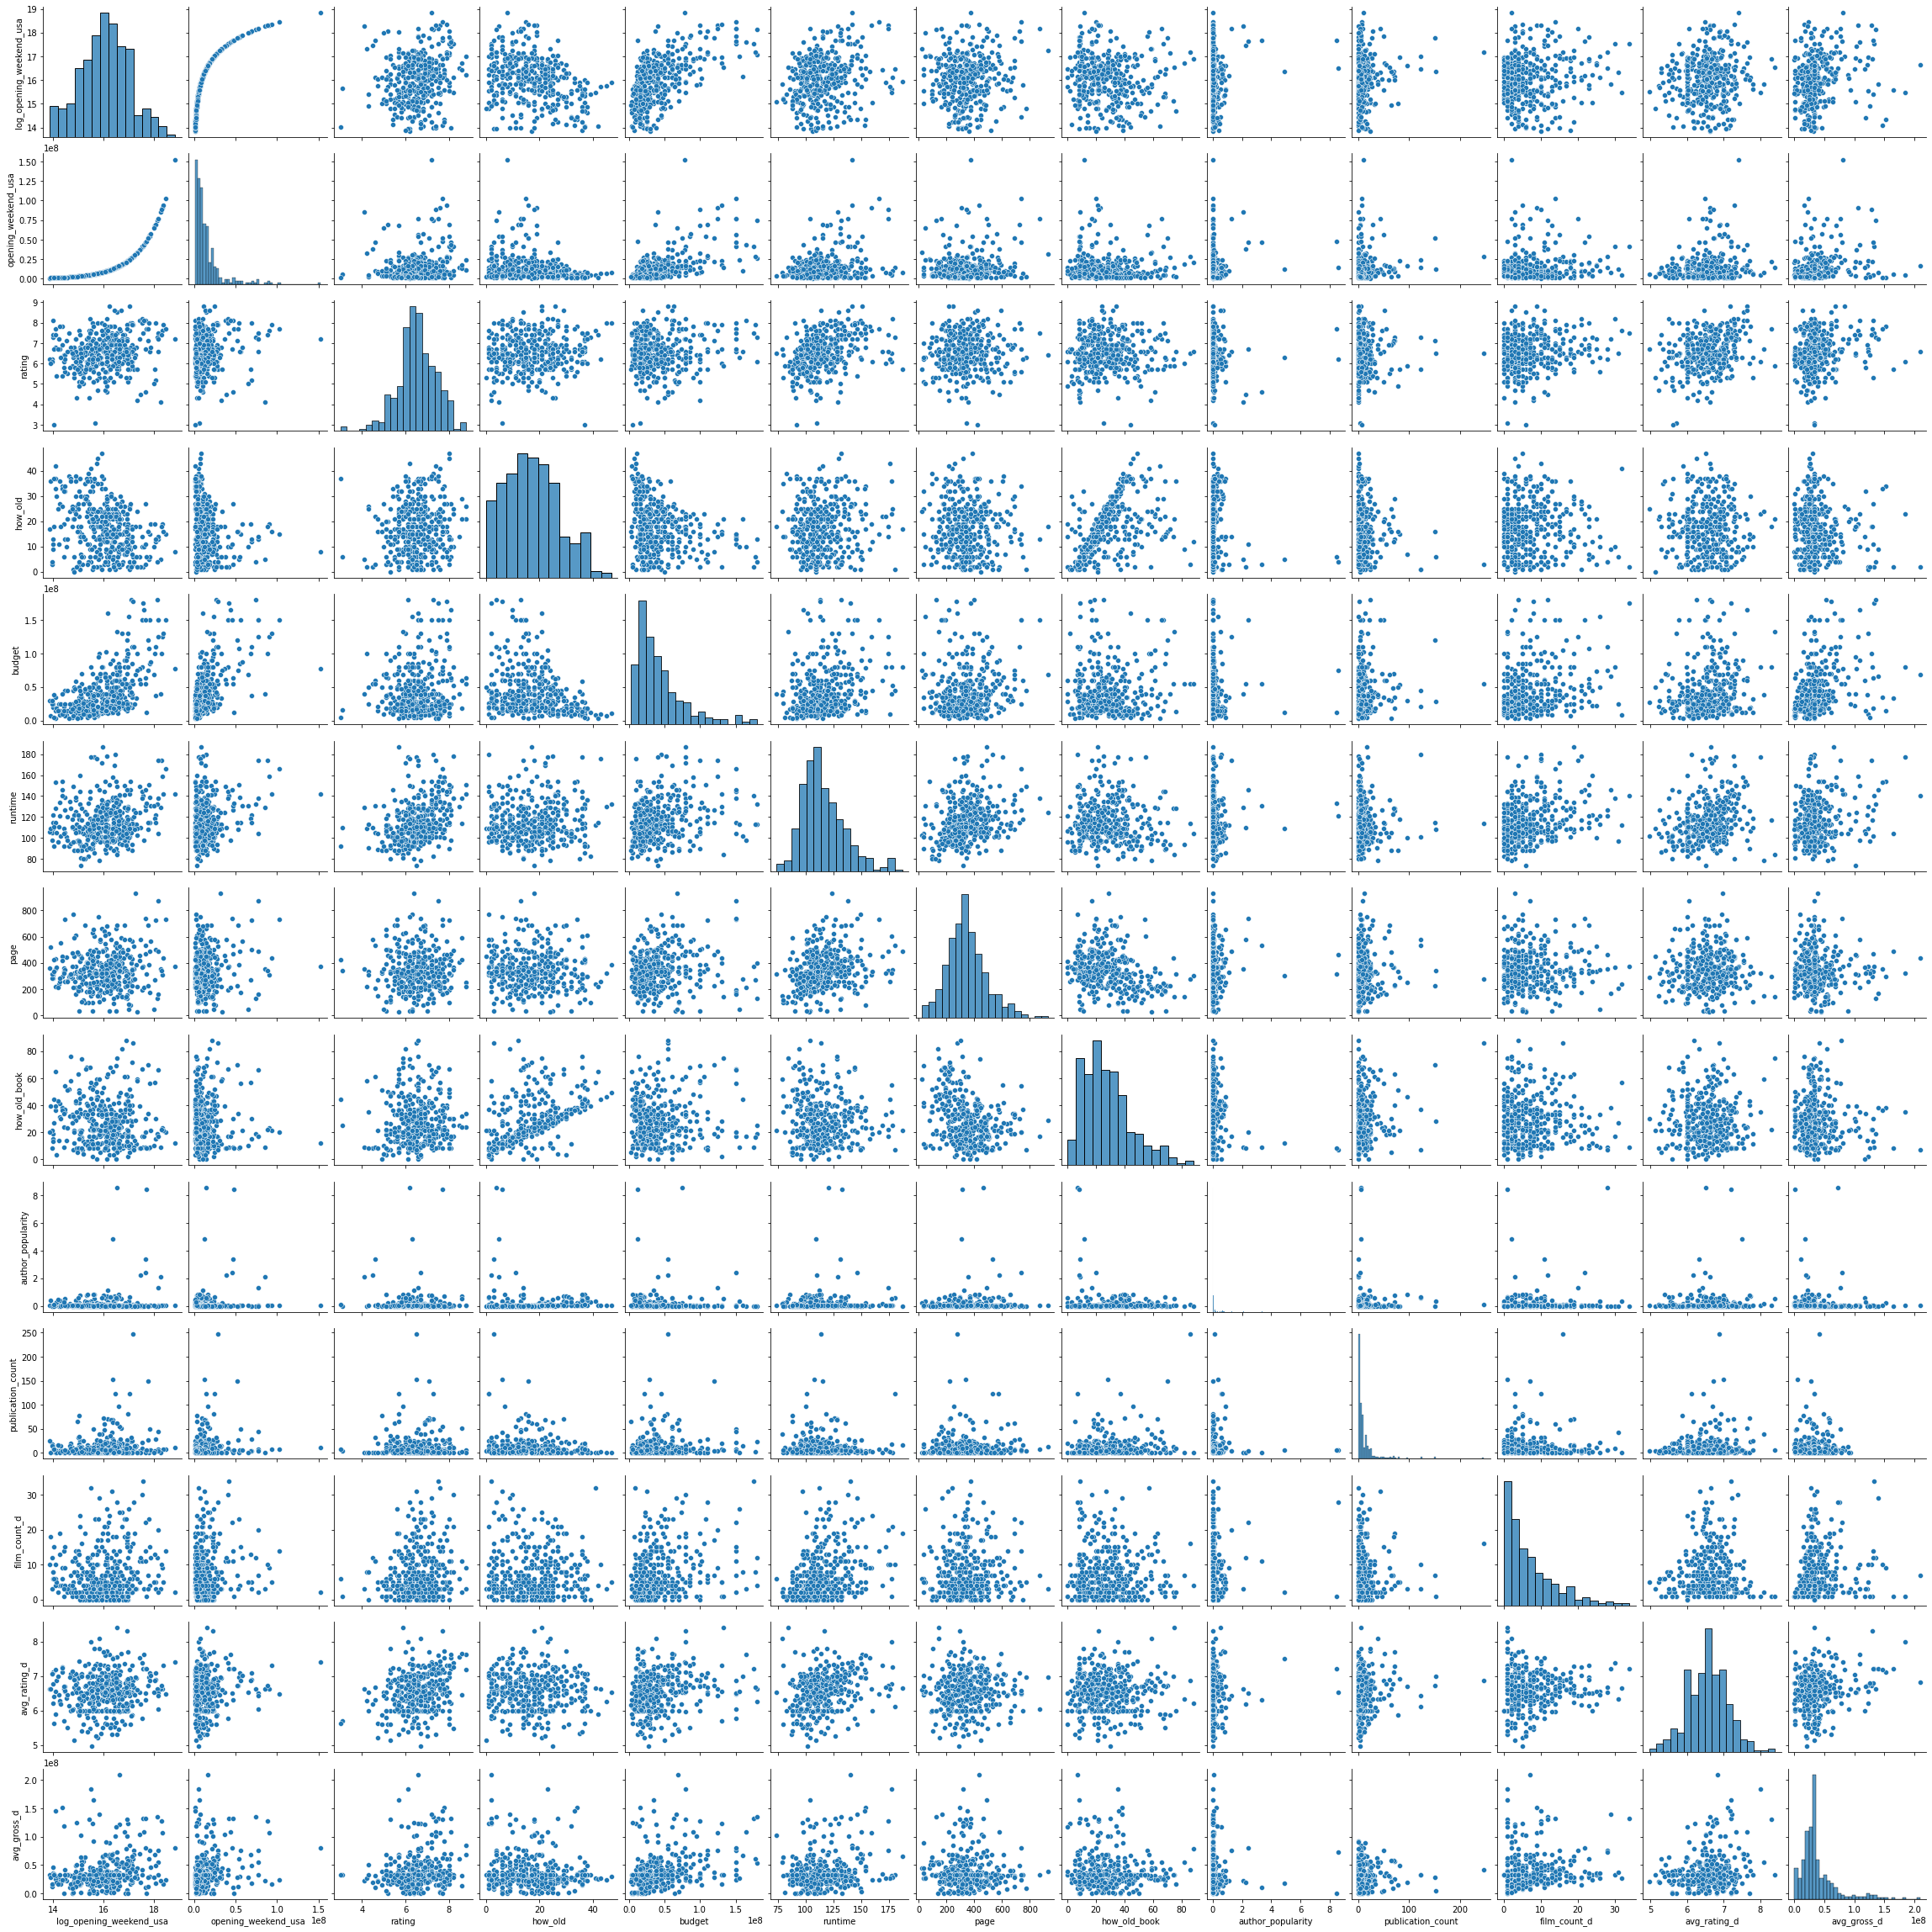

In [99]:
import seaborn as sns
sns.pairplot(all_df[['log_opening_weekend_usa','opening_weekend_usa','rating',\
                     'how_old','budget', 'runtime', 'page', 'how_old_book',\
                     'author_popularity', 'publication_count',\
                     'film_count_d','avg_rating_d','avg_gross_d']])

<AxesSubplot:>

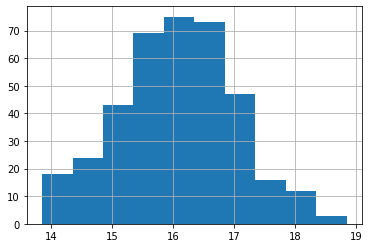

In [100]:
# Take log of opening_weekend_usa as target and graph.
all_df['log_opening_weekend_usa'] = np.log(all_df.opening_weekend_usa)
all_df['log_opening_weekend_usa'].hist()

In [101]:
all_df['log_year'] = np.log(all_df.year)
all_df['log_budget'] = np.log(all_df.budget)
all_df['log_avg_gross_d'] = np.log(all_df.avg_gross_d)

<AxesSubplot:>

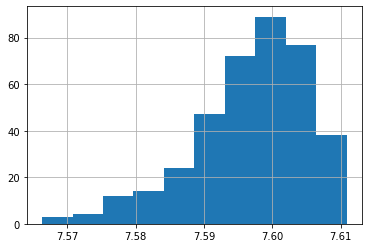

In [102]:
all_df['log_year'].hist()

<AxesSubplot:>

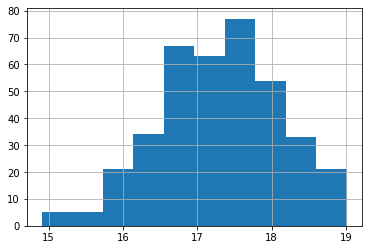

In [103]:
all_df['log_budget'].hist()

<AxesSubplot:>

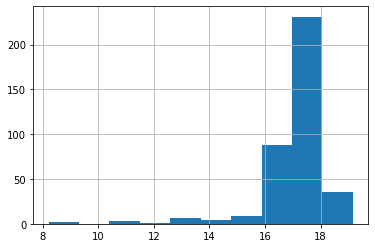

In [104]:
all_df['log_avg_gross_d'].hist()

<AxesSubplot:>

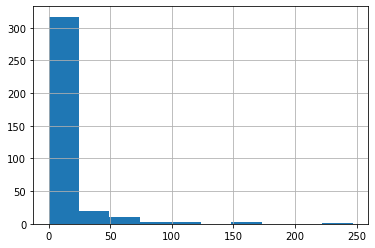

In [105]:
all_df['publication_count'].hist()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 5.5093883366279774] is not finite

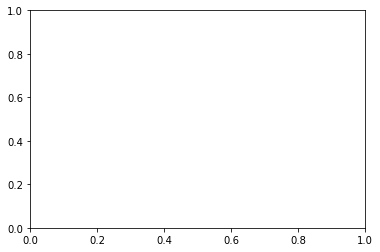

In [106]:
all_df['log_publication_count'] = np.log(all_df.publication_count)
all_df['log_publication_count'].hist()

### Multilabel categorical labels
### 1. genre
Find the top frequent genres and convert the column from list to set in preparation for `MultiLabelBinarizer()`.

In [107]:
# Find the top 10 genre
genre_all = []
for row in all_df.genre:
    genre_all += row
genre_count = []
for genre in set(genre_all):
    genre_count.append({'genre':genre,'count':genre_all.count(genre)})
sorted(genre_count, key = lambda i: i['count'],reverse=True)

[{'genre': 'Drama', 'count': 245},
 {'genre': 'Comedy', 'count': 102},
 {'genre': 'Action', 'count': 88},
 {'genre': 'Romance', 'count': 80},
 {'genre': 'Thriller', 'count': 80},
 {'genre': 'Adventure', 'count': 79},
 {'genre': 'Crime', 'count': 78},
 {'genre': 'Mystery', 'count': 60},
 {'genre': 'Fantasy', 'count': 51},
 {'genre': 'Family', 'count': 50},
 {'genre': 'Sci-Fi', 'count': 37},
 {'genre': 'Horror', 'count': 32},
 {'genre': 'Animation', 'count': 9},
 {'genre': 'Music', 'count': 6},
 {'genre': 'History', 'count': 6},
 {'genre': 'War', 'count': 6},
 {'genre': 'Biography', 'count': 5},
 {'genre': 'Western', 'count': 2},
 {'genre': 'Sport', 'count': 2}]

In [108]:
# Keep only the top 10 genre
genre_list = ['Drama','Adventure','Comedy','Action','Crime','Romance','Thriller',\
              'Mystery','Family','Fantasy']

In [109]:
# The rest will go to "Other"
all_df['genre']= all_df.genre.apply(lambda x:\
                            [genre if genre in genre_list else 'Other'for genre in x])

In [110]:
# movie_df.head()

In [111]:
# Convert genre column from list to set
all_df['genre'] = all_df.genre.apply(lambda x: set(x))
all_df[['genre']]

,genre
1,"{Adventure, Fantasy, Family}"
4,"{Adventure, Action, Other}"
7,"{Romance, Drama}"
8,"{Drama, Fantasy, Other}"
9,"{Drama, Mystery, Other}"
...,...
572,"{Adventure, Other, Family}"
573,{Adventure}
574,{Drama}
576,"{Drama, Action, Crime}"


### 2. language

In [112]:
# Find the top 10 language
language_all = []
for row in all_df.language:
    language_all += row
language_count = []
for language in set(language_all):
    language_count.append({'language':language,'count':language_all.count(language)})
sorted(language_count, key = lambda i: i['count'],reverse=True)

[{'language': 'English', 'count': 380},
 {'language': 'French', 'count': 38},
 {'language': 'Spanish', 'count': 35},
 {'language': 'German', 'count': 27},
 {'language': 'Russian', 'count': 25},
 {'language': 'Italian', 'count': 19},
 {'language': 'Arabic', 'count': 11},
 {'language': 'Mandarin', 'count': 9},
 {'language': 'Japanese', 'count': 6},
 {'language': 'Latin', 'count': 5},
 {'language': 'Ukrainian', 'count': 4},
 {'language': 'Polish', 'count': 4},
 {'language': 'Portuguese', 'count': 4},
 {'language': 'Chinese', 'count': 3},
 {'language': 'Swedish', 'count': 3},
 {'language': 'Turkish', 'count': 3},
 {'language': 'Dutch', 'count': 3},
 {'language': 'Thai', 'count': 2},
 {'language': 'Greek', 'count': 2},
 {'language': 'Hindi', 'count': 2},
 {'language': 'Danish', 'count': 2},
 {'language': 'Cantonese', 'count': 2},
 {'language': 'Serbian', 'count': 2},
 {'language': 'Romanian', 'count': 1},
 {'language': 'Khmer', 'count': 1},
 {'language': 'Armenian', 'count': 1},
 {'language

In [113]:
# Keep only the top 6 language
language_list = ['English','French','German','Spanish','Russian','Italian']

In [114]:
# The rest will go to "Other"
all_df['language']= all_df.language.apply(lambda x:\
                            [language if language in language_list else 'Other' for language in x])

In [115]:
# Convert genre column from list to set
all_df['language'] = all_df.language.apply(lambda x: set(x))
all_df[['language']]

,language
1,{English}
4,{English}
7,{English}
8,{English}
9,{English}
...,...
572,{English}
573,{English}
574,{English}
576,{English}


### 3. country

In [116]:
# Find the top 10 language
country_all = []
for row in all_df.country:
    country_all += row
country_count = []
for country in set(country_all):
    country_count.append({'country':country,'count':country_all.count(country)})
sorted(country_count, key = lambda i: i['count'],reverse=True)

[{'country': 'USA', 'count': 380},
 {'country': 'UK', 'count': 84},
 {'country': 'Germany', 'count': 39},
 {'country': 'Canada', 'count': 28},
 {'country': 'France', 'count': 24},
 {'country': 'India', 'count': 12},
 {'country': 'China', 'count': 8},
 {'country': 'Italy', 'count': 8},
 {'country': 'Mexico', 'count': 7},
 {'country': 'Sweden', 'count': 5},
 {'country': 'Japan', 'count': 5},
 {'country': 'Australia', 'count': 4},
 {'country': 'Hungary', 'count': 4},
 {'country': 'Ireland', 'count': 4},
 {'country': 'NewZealand', 'count': 3},
 {'country': 'Spain', 'count': 3},
 {'country': 'Switzerland', 'count': 3},
 {'country': 'CzechRepublic', 'count': 3},
 {'country': 'HongKong', 'count': 3},
 {'country': 'Malta', 'count': 2},
 {'country': 'Romania', 'count': 2},
 {'country': 'UnitedArabEmirates', 'count': 2},
 {'country': 'Bahamas', 'count': 1},
 {'country': 'Bulgaria', 'count': 1},
 {'country': 'Jordan', 'count': 1},
 {'country': 'Netherlands', 'count': 1},
 {'country': 'Israel', 'c

In [117]:
# Keep only the top 5 country
country_list = ['USA','UK','Germany','France','Canada']

In [118]:
# The rest will go to "Other"
all_df['country']= all_df.country.apply(lambda x:\
                            [country if country in country_list else 'Other' for country in x])

In [119]:
# Convert genre column from list to set
all_df['country'] = all_df.country.apply(lambda x: set(x))
all_df[['country']]

,country
1,"{UK, USA}"
4,"{USA, Other}"
7,{USA}
8,"{UK, USA}"
9,"{UK, USA}"
...,...
572,"{USA, Other}"
573,{USA}
574,{USA}
576,{USA}


### 4. actor

In [120]:
# Find corresponding value of each authorr when movie is released
# ['publications','author_visibility']


## Train test split

In [121]:
all_df.columns

Index(['index', 'movie_title_x', 'rating', 'MPAA', 'genre', 'release_date',
       'budget', 'opening_weekend_usa', 'gross_usa', 'gross_world', 'runtime',
       'director_x', 'writer', 'star', 'distributor', 'language', 'country',
       'author_x', 'page', 'year', 'book_popularity', 'author_popularity',
       'log_opening_weekend_usa', 'release_year', 'how_old', 'log_budget',
       'how_old_book', 'film_count_d', 'avg_rating_d', 'avg_gross_d',
       'publication_count', 'log_year', 'log_avg_gross_d',
       'log_publication_count'],
      dtype='object')

In [122]:
# Train test split
from sklearn.model_selection import train_test_split

X= all_df[['MPAA', 'distributor',\
           'genre', 'language', 'country',\
           'release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d', 'publication_count', 'author_popularity']]

y = all_df['opening_weekend_usa']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [123]:
# Train test split
# opening_weekend_usa cut and took log
from sklearn.model_selection import train_test_split

X= all_df[['MPAA', 'distributor',\
           'genre', 'language', 'country',\
           'release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d', 'publication_count', 'author_popularity']]

y = all_df['log_opening_weekend_usa']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [124]:
# Train test split
# Target: rating
from sklearn.model_selection import train_test_split

X= all_df[['MPAA', 'distributor',\
           'genre', 'language', 'country',\
           'release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d', 'publication_count', 'author_popularity']]

y = all_df['rating']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [125]:
# Train test split
# opening_weekend_usa cut and took log
# convert years to ages
from sklearn.model_selection import train_test_split

X= all_df[['MPAA', 'distributor',\
           'genre', 'language', 'country',\
           'how_old', 'budget','runtime','page','how_old_book',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d', 'publication_count', 'author_popularity']]

y = all_df['log_opening_weekend_usa']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [126]:
# Train test split
# opening_weekend_usa cut and took log
# convert years to ages
# Discard  'publication_count', 'author_popularity'
# add categorical variables
from sklearn.model_selection import train_test_split

X= all_df[['MPAA', 'distributor',\
           'genre', 'language', 'country',\
           'how_old', 'budget','runtime','page','how_old_book',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d']]

y = all_df['log_opening_weekend_usa']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [127]:
# Train test split
# Discard  'publication_count', 'author_popularity'
from sklearn.model_selection import train_test_split

X= all_df[['MPAA', 'distributor',\
           'genre', 'language', 'country',\
           'release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d', ]]

y = all_df['opening_weekend_usa']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [128]:
# Train test split
# Try log
from sklearn.model_selection import train_test_split

X= all_df[['MPAA', 'distributor',\
           'genre', 'language', 'country',\
           'release_year', 'log_budget','runtime','page','log_year',\
           'film_count_d', 'avg_rating_d', 'log_avg_gross_d']]

y = all_df['log_opening_weekend_usa']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Preprocessing


### A. Categorical variable preprocessing

### a. OneHotEncoder: for column with single object

#### Transform train set

In [129]:
# Categorical varibale: MPAA
cat_variables = ['MPAA']
X_train_cat = X_train[cat_variables]

In [130]:
# Instantiate a OneHotEncoder object
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, drop='first')
ohe.fit(X_train_cat)
cats = ohe.transform(X_train_cat)

In [131]:
# Create the categorical dataframe
columns = ohe.get_feature_names(cat_variables)
X_train_cat_df = pd.DataFrame(cats, columns = columns, index = X_train_cat.index)
X_train_cat_df.head()

,MPAA_PG,MPAA_PG-13,MPAA_R
179,1.0,0.0,0.0
264,0.0,1.0,0.0
483,0.0,0.0,1.0
77,0.0,0.0,1.0
315,0.0,1.0,0.0


In [132]:
# Test MPAA, distributor
cat_variables = ['MPAA','distributor']
X_train_cat = X_train[cat_variables]

In [133]:
# Instantiate a OneHotEncoder object
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, drop='first')
ohe.fit(X_train_cat)
cats = ohe.transform(X_train_cat)

In [134]:
# Create the categorical dataframe
columns = ohe.get_feature_names(cat_variables)
X_train_cat_df = pd.DataFrame(cats, columns = columns, index = X_train_cat.index)
X_train_cat_df.head()

,MPAA_PG,MPAA_PG-13,MPAA_R,distributor_Other,distributor_ParamountPictures,distributor_TwentiethCenturyFox,distributor_UniversalPictures,distributor_WarnerBros.
179,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
264,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
483,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
77,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
315,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Repeat transformations for testing set

In [135]:
X_test_cat = X_test[cat_variables]

cats_test = ohe.transform(X_test_cat)                           # REMBER ONLY TRANSFORM ON TEST SET

cat_columns = ohe.get_feature_names(cat_variables)
X_test_cat_df = pd.DataFrame(cats_test, columns=cat_columns, index=X_test_cat.index)
X_test_cat_df.head()

,MPAA_PG,MPAA_PG-13,MPAA_R,distributor_Other,distributor_ParamountPictures,distributor_TwentiethCenturyFox,distributor_UniversalPictures,distributor_WarnerBros.
135,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
355,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
185,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
228,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


### b. MultiLabelBinarizer: for column with list object

#### Transform train set

In [136]:
# Instantiate a MultiLabelBinarizer object
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

In [137]:
multilabel_variables = ['genre']
X_train_cats = X_train[multilabel_variables]

In [138]:
X_train_cats

,genre
179,"{Romance, Drama}"
264,"{Drama, Comedy}"
483,"{Romance, Drama, Comedy}"
77,"{Drama, Mystery, Crime}"
315,"{Adventure, Action, Other}"
...,...
489,"{Romance, Comedy}"
190,"{Adventure, Fantasy, Family}"
42,"{Adventure, Comedy, Family}"
68,"{Adventure, Drama, Action}"


In [139]:
# Test on genre column first
multilabel_variables = ['genre']
X_train_cats = X_train[multilabel_variables]
X_train_cats_df1 = pd.DataFrame(mlb.fit_transform(X_train_cats['genre']),\
                               columns=mlb.classes_, index=X_train_cats.index)
X_train_cats_df1.drop(columns='Other',inplace=True)

In [140]:
mlb.classes_

array(['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'Mystery', 'Other', 'Romance', 'Thriller'], dtype=object)

In [141]:
X_train_cats_df1

,Action,Adventure,Comedy,Crime,Drama,Family,Fantasy,Mystery,Romance,Thriller
179,0,0,0,0,1,0,0,0,1,0
264,0,0,1,0,1,0,0,0,0,0
483,0,0,1,0,1,0,0,0,1,0
77,0,0,0,1,1,0,0,1,0,0
315,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
489,0,0,1,0,0,0,0,0,1,0
190,0,1,0,0,0,1,1,0,0,0
42,0,1,1,0,0,1,0,0,0,0
68,1,1,0,0,1,0,0,0,0,0


In [142]:
# Test on language column
multilabel_variables = ['language']
X_train_cats = X_train[multilabel_variables]
X_train_cats_df2 = pd.DataFrame(mlb.fit_transform(X_train_cats['language']),\
                               columns=mlb.classes_, index=X_train_cats.index)
X_train_cats_df2.drop(columns='Other',inplace=True)

In [143]:
mlb.classes_

array(['English', 'French', 'German', 'Italian', 'Other', 'Russian',
       'Spanish'], dtype=object)

In [144]:
# Test on country column
multilabel_variables = ['country']
X_train_cats = X_train[multilabel_variables]
X_train_cats_df3 = pd.DataFrame(mlb.fit_transform(X_train_cats['country']),\
                               columns=mlb.classes_, index=X_train_cats.index)
X_train_cats_df3.drop(columns='Other',inplace=True)

In [145]:
mlb.classes_

array(['Canada', 'France', 'Germany', 'Other', 'UK', 'USA'], dtype=object)

In [146]:
# Merge all df1, df2, df3
df12 = pd.merge(X_train_cats_df1,X_train_cats_df2,left_index=True,right_index=True,how='left')

In [147]:
df123 = pd.merge(df12,X_train_cats_df3,left_index=True,right_index=True,how='left')

In [148]:
df123

,Action,Adventure,Comedy,Crime,Drama,Family,Fantasy,Mystery,Romance,Thriller,...,French,German,Italian,Russian,Spanish,Canada,France,Germany,UK,USA
179,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
264,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
483,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
77,0,0,0,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
315,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
190,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
42,0,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
68,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [149]:
# # Test on all multilabel columns????
# multilabel_variables = ['genre','language','country']
# X_train_cats = X_train[multilabel_variables]
# tempdf = pd.get_dummies(X_train_cats, columns=multilabel_variables)

In [150]:
# X_train_cats = X_train[multilabel_variables]
# X_train_cats_df = pd.DataFrame(mlb.fit_transform(X_train_cats['genre','language','country']),\
#                                columns=mlb.classes_, index=X_train_cats.index)
# X_train_cats_df.drop(columns='Other',inplace=True)

#### Repeat transformations for testing set

In [151]:
# Test on genre column first
multilabel_variables = ['genre']
X_test_cats = X_test[multilabel_variables]
X_test_cats_df1 = pd.DataFrame(mlb.fit_transform(X_test_cats['genre']),\
                               columns=mlb.classes_, index=X_test_cats.index)
X_test_cats_df1.drop(columns='Other',inplace=True)

In [152]:
# Test on language column
multilabel_variables = ['language']
X_test_cats = X_test[multilabel_variables]
X_test_cats_df2 = pd.DataFrame(mlb.fit_transform(X_test_cats['language']),\
                               columns=mlb.classes_, index=X_test_cats.index)
X_test_cats_df2.drop(columns='Other',inplace=True)

In [153]:
# Test on country column
multilabel_variables = ['country']
X_test_cats = X_test[multilabel_variables]
X_test_cats_df3 = pd.DataFrame(mlb.fit_transform(X_test_cats['country']),\
                               columns=mlb.classes_, index=X_test_cats.index)
X_test_cats_df3.drop(columns='Other',inplace=True)

In [154]:
# Merge all df1, df2, df3
df12_test = pd.merge(X_test_cats_df1,X_test_cats_df2,left_index=True,right_index=True,how='left')
df123_test = pd.merge(df12_test,X_test_cats_df3,left_index=True,right_index=True,how='left')

### B. Continuous variable preprocessing

In [210]:
# Select continuous variables from training set
X_train_cont = X_train[['release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d', 'publication_count', 'author_popularity']]

X_train_cont.head()

KeyError: "['budget', 'author_popularity', 'avg_gross_d', 'publication_count', 'year'] not in index"

### Standardize continuous variables
#### Start with train set

In [211]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train_cont)
X_train_scaled = ss.transform(X_train_cont)

cont_columns = X_train_cont.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cont_columns, index=X_train_cont.index)

X_train_scaled_df.head()

,release_year,log_budget,runtime,page,log_year,film_count_d,avg_rating_d,log_avg_gross_d
179,-0.066816,-1.236889,-0.749821,-0.753308,0.384468,-0.886417,-2.214627,0.652271
264,1.642607,-0.590571,-0.355537,-0.112334,1.171405,1.938223,0.796125,-0.524549
483,-0.469033,-0.942964,-0.256966,-0.183554,-0.346490,-0.745185,0.779352,-0.722432
77,1.642607,-0.269191,1.369457,-0.247651,0.384468,-0.886417,-0.453463,0.251590
315,0.033739,1.107554,3.488735,1.020053,0.384468,1.655759,0.167579,0.720894


#### Repeat for test set

In [ ]:
X_test_cont = X_test[['release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d', 'publication_count', 'author_popularity']]


X_test_scaled = ss.transform(X_test_cont)

cont_columns = X_test_cont.columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=cont_columns, index=X_test_cont.index)

X_test_scaled_df.head()

In [ ]:
X_test_scaled_df.shape

In [ ]:
# Target variable: 'log_opening_weekend_usa'
# took log

In [ ]:
# Train set
# Select continuous variables from training set
X_train_cont = X_train[['release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d']]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train_cont)
X_train_scaled = ss.transform(X_train_cont)

cont_columns = X_train_cont.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cont_columns, index=X_train_cont.index)



# Test set
X_test_cont = X_test[['release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d']]


X_test_scaled = ss.transform(X_test_cont)

cont_columns = X_test_cont.columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=cont_columns, index=X_test_cont.index)


In [ ]:
# Target variable: 'log_opening_weekend_usa'
# took log
# convert years to ages

# Train set
# Select continuous variables from training set
X_train_cont = X_train[['how_old', 'budget','runtime','page','how_old_book',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d']]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train_cont)
X_train_scaled = ss.transform(X_train_cont)

cont_columns = X_train_cont.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cont_columns, index=X_train_cont.index)



# Test set
X_test_cont = X_test[['how_old', 'budget','runtime','page','how_old_book',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d']]


X_test_scaled = ss.transform(X_test_cont)

cont_columns = X_test_cont.columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=cont_columns, index=X_test_cont.index)


In [ ]:
# Try discard 'publication_count', 'author_popularity'

In [ ]:
# Train set
# Select continuous variables from training set
X_train_cont = X_train[['release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d']]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train_cont)
X_train_scaled = ss.transform(X_train_cont)

cont_columns = X_train_cont.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cont_columns, index=X_train_cont.index)



# Test set
X_test_cont = X_test[['release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d']]


X_test_scaled = ss.transform(X_test_cont)

cont_columns = X_test_cont.columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=cont_columns, index=X_test_cont.index)


In [156]:
# Try for log_ variables

In [157]:
# Train set
# Select continuous variables from training set
X_train_cont = X_train[['release_year', 'log_budget','runtime','page','log_year',\
           'film_count_d', 'avg_rating_d', 'log_avg_gross_d']]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train_cont)
X_train_scaled = ss.transform(X_train_cont)

cont_columns = X_train_cont.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cont_columns, index=X_train_cont.index)

X_train_scaled_df.head()

,release_year,log_budget,runtime,page,log_year,film_count_d,avg_rating_d,log_avg_gross_d
179,-0.066816,-1.236889,-0.749821,-0.753308,0.384468,-0.886417,-2.214627,0.652271
264,1.642607,-0.590571,-0.355537,-0.112334,1.171405,1.938223,0.796125,-0.524549
483,-0.469033,-0.942964,-0.256966,-0.183554,-0.346490,-0.745185,0.779352,-0.722432
77,1.642607,-0.269191,1.369457,-0.247651,0.384468,-0.886417,-0.453463,0.251590
315,0.033739,1.107554,3.488735,1.020053,0.384468,1.655759,0.167579,0.720894


In [158]:
# Test set
X_test_cont = X_test[['release_year', 'log_budget','runtime','page','log_year',\
           'film_count_d', 'avg_rating_d', 'log_avg_gross_d']]


X_test_scaled = ss.transform(X_test_cont)

cont_columns = X_test_cont.columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=cont_columns, index=X_test_cont.index)

X_test_scaled_df.head()

,release_year,log_budget,runtime,page,log_year,film_count_d,avg_rating_d,log_avg_gross_d
135,0.435956,1.497640,-0.059824,2.700829,-0.163338,-0.321489,0.920245,0.468003
355,1.240390,-1.216301,-0.355537,-0.290383,0.929813,-0.745185,1.659933,-0.341057
185,0.335401,1.380891,-0.601964,1.119760,0.566522,-1.027649,-0.981812,0.147606
74,1.139836,0.059416,-0.158395,0.272250,0.990256,-0.603953,0.661941,0.147606
228,0.938727,-0.789647,-1.045534,-1.479745,-0.591125,-0.886417,0.427119,-6.740121


## Combine the categorical and continuous features for train/test set

#### Start with train set

In [159]:
# A (single label categorical)
X_train_cat_df

,MPAA_PG,MPAA_PG-13,MPAA_R,distributor_Other,distributor_ParamountPictures,distributor_TwentiethCenturyFox,distributor_UniversalPictures,distributor_WarnerBros.
179,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
264,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
483,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
77,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
315,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
489,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
190,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
42,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [160]:
# B (multi label categorical)
df123

,Action,Adventure,Comedy,Crime,Drama,Family,Fantasy,Mystery,Romance,Thriller,...,French,German,Italian,Russian,Spanish,Canada,France,Germany,UK,USA
179,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
264,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
483,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
77,0,0,0,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
315,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
190,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
42,0,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
68,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [161]:
# A+B
X_train_cat_df_all = X_train_cat_df.merge(df123,left_index=True, right_index=True)

In [162]:
# A+B + cont
X_train_combined = pd.concat([X_train_cat_df_all, X_train_scaled_df], axis='columns')

X_train_combined.head()

,MPAA_PG,MPAA_PG-13,MPAA_R,distributor_Other,distributor_ParamountPictures,distributor_TwentiethCenturyFox,distributor_UniversalPictures,distributor_WarnerBros.,Action,Adventure,...,UK,USA,release_year,log_budget,runtime,page,log_year,film_count_d,avg_rating_d,log_avg_gross_d
179,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,...,0,1,-0.066816,-1.236889,-0.749821,-0.753308,0.384468,-0.886417,-2.214627,0.652271
264,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,...,0,1,1.642607,-0.590571,-0.355537,-0.112334,1.171405,1.938223,0.796125,-0.524549
483,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,...,0,1,-0.469033,-0.942964,-0.256966,-0.183554,-0.346490,-0.745185,0.779352,-0.722432
77,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,...,0,1,1.642607,-0.269191,1.369457,-0.247651,0.384468,-0.886417,-0.453463,0.251590
315,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,...,0,1,0.033739,1.107554,3.488735,1.020053,0.384468,1.655759,0.167579,0.720894


In [163]:
X_train_combined.shape

(304, 37)

#### Repeat for test set

In [164]:
# A+B
X_test_cat_df_all = X_test_cat_df.merge(df123_test,left_index=True, right_index=True)
# A+B + cont
X_test_combined = pd.concat([X_test_cat_df_all, X_test_scaled_df], axis='columns')

X_test_combined.head()

,MPAA_PG,MPAA_PG-13,MPAA_R,distributor_Other,distributor_ParamountPictures,distributor_TwentiethCenturyFox,distributor_UniversalPictures,distributor_WarnerBros.,Action,Adventure,...,UK,USA,release_year,log_budget,runtime,page,log_year,film_count_d,avg_rating_d,log_avg_gross_d
135,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,...,0,1,0.435956,1.497640,-0.059824,2.700829,-0.163338,-0.321489,0.920245,0.468003
355,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,...,0,1,1.240390,-1.216301,-0.355537,-0.290383,0.929813,-0.745185,1.659933,-0.341057
185,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,...,1,1,0.335401,1.380891,-0.601964,1.119760,0.566522,-1.027649,-0.981812,0.147606
74,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,...,1,1,1.139836,0.059416,-0.158395,0.272250,0.990256,-0.603953,0.661941,0.147606
228,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,...,1,1,0.938727,-0.789647,-1.045534,-1.479745,-0.591125,-0.886417,0.427119,-6.740121


In [165]:
X_test_combined.shape

(76, 37)

## Instantiate the Linear Regression Model and make Predictions

### Fit and predict

In [166]:
# Test with continuous variable only
lr = LinearRegression()

lr.fit(X_train_scaled_df, y_train)

y_pred = lr.predict(X_test_scaled_df)

y_pred

array([16.7819886 , 15.64608984, 16.74526418, 16.24487321, 16.04890401,
       15.84047354, 16.61593093, 15.75646406, 14.94596533, 16.21983871,
       15.45365908, 17.29947814, 15.58548837, 16.35993454, 16.22690542,
       15.94620231, 15.42229682, 16.20077663, 16.4546065 , 16.07753656,
       15.14537672, 15.94536281, 16.62044341, 14.96748239, 15.80560123,
       15.61118132, 16.31144084, 17.12864319, 15.87057762, 15.8906912 ,
       15.62540078, 15.62859852, 15.13716495, 16.5082325 , 15.57143265,
       15.420063  , 16.1159333 , 16.35870147, 16.22782416, 15.14970065,
       15.97021757, 16.27227837, 15.87764941, 16.50175878, 16.17358865,
       16.47374966, 15.9827384 , 15.3153262 , 15.40252368, 15.80452043,
       15.68940222, 16.79101037, 16.8980186 , 16.13705974, 16.38693639,
       15.63301263, 15.946844  , 15.8504648 , 15.82469785, 15.92992889,
       16.20415599, 15.14660157, 16.53981547, 16.0505671 , 15.40923729,
       15.52221822, 16.07905146, 16.37515168, 16.34227483, 16.96

In [167]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 0.80
r2: 0.38


In [168]:
# Test with continuous variable only again
lr = LinearRegression()

lr.fit(X_train_scaled_df, y_train)

y_pred = lr.predict(X_test_scaled_df)

y_pred

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 0.80
r2: 0.38


In [169]:
# Test with continuous variable but with target 'log_opening_weekend_usa'
# Took log
lr = LinearRegression()

lr.fit(X_train_scaled_df, y_train)

y_pred = lr.predict(X_test_scaled_df)

y_pred

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 0.80
r2: 0.38


In [170]:
# Test with continuous variable but with target 'log_opening_weekend_usa'
# Took log
# convert years to ages
lr = LinearRegression()

lr.fit(X_train_scaled_df, y_train)

y_pred = lr.predict(X_test_scaled_df)

y_pred

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 0.80
r2: 0.38


### Cross-validation

In [171]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, X_train_scaled_df, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

array([0.37056881, 0.20086008, 0.4764336 , 0.16599385, 0.25230219])

In [172]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lm, X_train_scaled_df, y_train, cv=kf, scoring='r2')

array([0.36067104, 0.28705833, 0.28367043, 0.34577331, 0.30208195])

In [173]:
# Test with continuous variable only
# Discard publication and author popularity
lr = LinearRegression()

lr.fit(X_train_scaled_df, y_train)

y_pred = lr.predict(X_test_scaled_df)

y_pred

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 0.80
r2: 0.38


In [174]:
# Test with continuous variable only
# Target changed to np.log('opening_weekend_usa')
lr = LinearRegression()

lr.fit(X_train_scaled_df, y_train)

y_pred = lr.predict(X_test_scaled_df)

y_pred

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 0.80
r2: 0.38


In [175]:
# Fit and predict on all data
lr = LinearRegression()

lr.fit(X_train_combined, y_train)

y_pred = lr.predict(X_test_combined)

y_pred

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 0.76
r2: 0.45


### Evaluate

In [176]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 0.76
r2: 0.45


In [177]:
# score = lr.score(X_test_combined, y_test) 
# score

### Coefficients

In [178]:
feature_names = X_test_combined.columns

coefficient_values = np.round(lr.coef_, 3)

feats_values = list(zip(feature_names, coefficient_values)) 

sorted(feats_values, key=lambda x: x[1])

[('MPAA_R', -0.522),
 ('Drama', -0.329),
 ('Action', -0.174),
 ('Comedy', -0.167),
 ('Germany', -0.161),
 ('France', -0.14),
 ('UK', -0.135),
 ('MPAA_PG-13', -0.088),
 ('log_avg_gross_d', -0.081),
 ('Russian', -0.058),
 ('film_count_d', -0.052),
 ('Mystery', -0.012),
 ('Fantasy', -0.006),
 ('English', -0.0),
 ('USA', -0.0),
 ('French', 0.015),
 ('log_year', 0.015),
 ('avg_rating_d', 0.025),
 ('page', 0.036),
 ('Italian', 0.037),
 ('MPAA_PG', 0.05),
 ('Family', 0.071),
 ('Canada', 0.092),
 ('Romance', 0.099),
 ('runtime', 0.109),
 ('Adventure', 0.142),
 ('Spanish', 0.172),
 ('German', 0.183),
 ('release_year', 0.197),
 ('distributor_Other', 0.22),
 ('Thriller', 0.221),
 ('Crime', 0.252),
 ('log_budget', 0.4),
 ('distributor_UniversalPictures', 0.437),
 ('distributor_ParamountPictures', 0.532),
 ('distributor_WarnerBros.', 0.6),
 ('distributor_TwentiethCenturyFox', 0.986)]

## Visualization

In [179]:
# Reminder
# X= all_df[['MPAA', 'distributor',\
#            'genre', 'language', 'country',\
#            'release_year', 'budget','runtime','page','year',\
#            'film_count_d', 'avg_rating_d', 'avg_gross_d', 'publication_count', 'author_popularity']]

# y = all_df['opening_weekend_usa']
# y_pred

In [180]:
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

In [181]:
y_pred.shape

(76,)

In [182]:
y_test.shape

(76,)

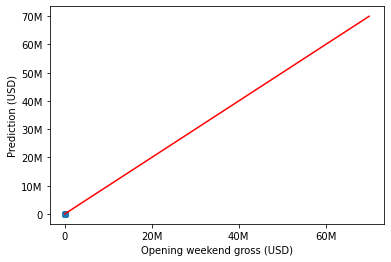

In [183]:
# Without data selection
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
plt.scatter(y_test, y_pred)

ax.set_xlabel('Opening weekend gross (USD)')
ax.set_ylabel('Prediction (USD)')

ax.set_xticks([0,0.2e8,0.4e8,0.6e8,0.8e8,1e8,1.2e8,1.4e8,1.6e8])
ax.set_xticklabels(['0','20M','40M','60M','80M','100M','120M','140M','160M'])
ax.set_yticks([0,0.1e8,0.2e8,0.3e8,0.4e8,0.5e8,0.6e8,0.7e8])
ax.set_yticklabels(['0','10M','20M','30M','40M','50M','60M','70M'])

x=np.linspace(0,0.7e8,50)
y=x
plt.plot(x,y,color='red')

In [184]:
# Test with continuous variable only again
lr = LinearRegression()
lr.fit(X_train_scaled_df, y_train)
y_pred = lr.predict(X_test_scaled_df)
y_pred
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 0.80
r2: 0.38


### Data selected based on opening_weekend_usa and log taken

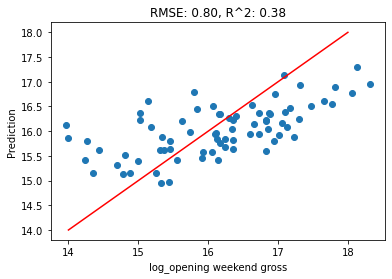

In [185]:
# Cut and took log on opening_weekend_usa
fig, ax = plt.subplots(1, 1)
plt.scatter(y_test, y_pred)

ax.set_xlabel('log_opening weekend gross')
ax.set_ylabel('Prediction')

ax.set_title(f'RMSE: {rmse:.2f}, R^2: {r2:.2f}')

# ax.set_xticks([0,0.2e8,0.4e8,0.6e8,0.8e8,1e8,1.2e8,1.4e8,1.6e8])
# ax.set_xticklabels(['0','20M','40M','60M','80M','100M','120M','140M','160M'])
# ax.set_yticks([0,0.1e8,0.2e8,0.3e8,0.4e8,0.5e8,0.6e8,0.7e8])
# ax.set_yticklabels(['0','10M','20M','30M','40M','50M','60M','70M'])

x=np.linspace(14,18,50)
y=x
plt.plot(x,y,color='red')
# plt.plot(x,lr.predict(x))

In [186]:
# Test with continuous variable but with target 'log_opening_weekend_usa'
# Took log
lr = LinearRegression()
lr.fit(X_train_scaled_df, y_train)
y_pred = lr.predict(X_test_scaled_df)
y_pred
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 0.80
r2: 0.38


### Try LASSO

In [187]:
%pylab inline
#% config InlineBackend.figure_format = 'svg'

import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

Populating the interactive namespace from numpy and matplotlib


In [188]:
## Fit a LASSO model on the standardized data

lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train_scaled_df,y_train)
list(zip(X_train_scaled_df.columns, lasso_model.coef_))

[('release_year', 0.14943559561346942),
 ('log_budget', 0.5006999835182343),
 ('runtime', 0.08244697843148747),
 ('page', -0.019879883788484858),
 ('log_year', 0.005180110411252098),
 ('film_count_d', -0.049111876290240164),
 ('avg_rating_d', 0.0028241018316830825),
 ('log_avg_gross_d', -0.04119371592559029)]

In [189]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha


alphavec = 10**np.linspace(-2,2,1000)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train_scaled_df, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.00926219e-02, 1.01861017e-02, 1.02804473e-02,
       1.03756668e-02, 1.04717682e-02, 1.05687597e-02, 1.06666496e-02,
       1.07654461e-02, 1.08651577e-02, 1.09657929e-02, 1.10673602e-02,
       1.11698682e-02, 1.12733256e-02, 1.13777413e-02, 1.14831241e-02,
       1.15894830e-02, 1.16968270e-02, 1.18051653e-02, 1.19145070e-02,
       1.20248614e-02, 1.21362380e-0...
       8.08924349e+01, 8.16416760e+01, 8.23978568e+01, 8.31610415e+01,
       8.39312950e+01, 8.47086827e+01, 8.54932707e+01, 8.62851257e+01,
       8.70843150e+01, 8.78909065e+01, 8.87049689e+01, 8.95265713e+01,
       9.03557835e+01, 9.11926760e+01, 9.20373200e+01, 9.28897872e+01,
       9.37501502e+01, 9.46184819e+01, 9.54948564e+01, 9.63793480e+01,
       9.72720319e+01, 9.81729841e+01, 9.90822810e+01, 1.00000000e+02]),
        cv=5)

In [190]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

0.04174655289253137

In [191]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_test_scaled_df)
r2_score(y_test, test_set_pred)

0.35864966233392415

In [192]:
X_test_scaled_df.columns

Index(['release_year', 'log_budget', 'runtime', 'page', 'log_year',
       'film_count_d', 'avg_rating_d', 'log_avg_gross_d'],
      dtype='object')

### Try Ridge

In [193]:
## Fit a LASSO model on the standardized data

ridge_model = Ridge(alpha = 0.001)
ridge_model.fit(X_train_scaled_df,y_train)
list(zip(X_train_scaled_df.columns, ridge_model.coef_))

[('release_year', 0.14937655891460996),
 ('log_budget', 0.502191307779736),
 ('runtime', 0.084127150975591),
 ('page', -0.021970477567853846),
 ('log_year', 0.006811306580200531),
 ('film_count_d', -0.05068098662711445),
 ('avg_rating_d', 0.003487744880136562),
 ('log_avg_gross_d', -0.04266650508107957)]

In [194]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,1000)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_train_scaled_df, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.00926219e-02, 1.01861017e-02, 1.02804473e-02,
       1.03756668e-02, 1.04717682e-02, 1.05687597e-02, 1.06666496e-02,
       1.07654461e-02, 1.08651577e-02, 1.09657929e-02, 1.10673602e-02,
       1.11698682e-02, 1.12733256e-02, 1.13777413e-02, 1.14831241e-02,
       1.15894830e-02, 1.16968270e-02, 1.18051653e-02, 1.19145070e-02,
       1.20248614e-02, 1.21362380e-0...
       8.08924349e+01, 8.16416760e+01, 8.23978568e+01, 8.31610415e+01,
       8.39312950e+01, 8.47086827e+01, 8.54932707e+01, 8.62851257e+01,
       8.70843150e+01, 8.78909065e+01, 8.87049689e+01, 8.95265713e+01,
       9.03557835e+01, 9.11926760e+01, 9.20373200e+01, 9.28897872e+01,
       9.37501502e+01, 9.46184819e+01, 9.54948564e+01, 9.63793480e+01,
       9.72720319e+01, 9.81729841e+01, 9.90822810e+01, 1.00000000e+02]),
        cv=5)

In [195]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
ridge_model.alpha_

31.878912926776458

In [196]:
# Make predictions on the test set using the new model
test_set_pred = ridge_model.predict(X_test_scaled_df)
r2_score(y_test, test_set_pred)

0.3631622628341188

### OneHotEncoder with list item (e.g. genre)

In [197]:
# Example
d = {'A': [[5,7], [3, 4, 5], [2], [1,2,3,4]]}
df = pd.DataFrame(data=d)
df

,A
0,"[5, 7]"
1,"[3, 4, 5]"
2,[2]
3,"[1, 2, 3, 4]"


In [198]:
# Use MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
df_ohe = pd.DataFrame(mlb.fit_transform(df['A']),columns = mlb.classes_, index=df.index)
df_ohe

,1,2,3,4,5,7
0,0,0,0,0,1,1
1,0,0,1,1,1,0
2,0,1,0,0,0,0
3,1,1,1,1,0,0


In [199]:
# Test on genre
cat_variable = ['genre']
X_train_cat = X_train[cat_variable]

In [200]:
X_train_cat

,genre
179,"{Romance, Drama}"
264,"{Drama, Comedy}"
483,"{Romance, Drama, Comedy}"
77,"{Drama, Mystery, Crime}"
315,"{Adventure, Action, Other}"
...,...
489,"{Romance, Comedy}"
190,"{Adventure, Fantasy, Family}"
42,"{Adventure, Comedy, Family}"
68,"{Adventure, Drama, Action}"


In [201]:
X_train_cat_test = X_train_cat.iloc[:3,:].copy()
X_train_cat_test

,genre
179,"{Romance, Drama}"
264,"{Drama, Comedy}"
483,"{Romance, Drama, Comedy}"


In [202]:
X_train_cat_set = X_train_cat.copy()

In [203]:
def list_set(my_list):
    return set(my_list)

In [204]:
X_train_cat_set

,genre
179,"{Romance, Drama}"
264,"{Drama, Comedy}"
483,"{Romance, Drama, Comedy}"
77,"{Drama, Mystery, Crime}"
315,"{Adventure, Action, Other}"
...,...
489,"{Romance, Comedy}"
190,"{Adventure, Fantasy, Family}"
42,"{Adventure, Comedy, Family}"
68,"{Adventure, Drama, Action}"


In [205]:
X_train_cat_df = pd.DataFrame(mlb.fit_transform(X_train_cat_set['genre']),\
                              columns=mlb.classes_,index=X_train_cat_set.index)
X_train_cat_df.drop(columns='Other',inplace=True)

In [206]:
X_train_cat_df

,Action,Adventure,Comedy,Crime,Drama,Family,Fantasy,Mystery,Romance,Thriller
179,0,0,0,0,1,0,0,0,1,0
264,0,0,1,0,1,0,0,0,0,0
483,0,0,1,0,1,0,0,0,1,0
77,0,0,0,1,1,0,0,1,0,0
315,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
489,0,0,1,0,0,0,0,0,1,0
190,0,1,0,0,0,1,1,0,0,0
42,0,1,1,0,0,1,0,0,0,0
68,1,1,0,0,1,0,0,0,0,0


In [207]:
len(mlb.classes_),mlb.classes_

(11,
 array(['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Family',
        'Fantasy', 'Mystery', 'Other', 'Romance', 'Thriller'], dtype=object))

In [208]:
X_train_cat_df.sum(axis=0).sort_values(ascending=False)

Drama        204
Comedy        80
Action        71
Crime         64
Thriller      62
Romance       61
Adventure     61
Mystery       47
Fantasy       39
Family        35
dtype: int64